In [1]:
# 如下，因为这个遍历是需要类的定义的，这里用调入其他项目的方式来做，我用这个来调入，
import Ipynb_importer  # 我从网上下载的，放在D:\Anaconda3\DLLs目录中了，你可以自己搜索下载。
from  图的概念性质和实现 import Graph
from 图的概念性质和实现 import GraphAL
from 图的概念性质和实现 import KGraphAL

importing Jupyter notebook from 图的概念性质和实现.ipynb


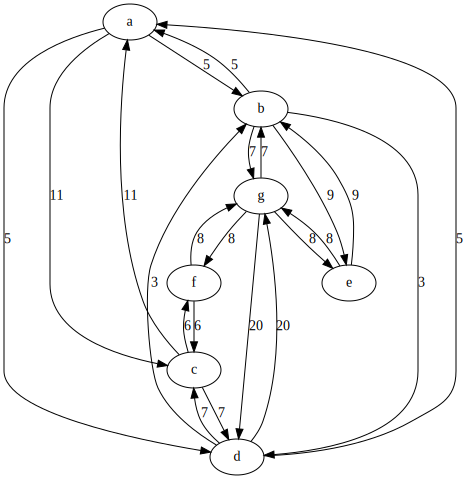

In [2]:
# 因为这个文件涉及到图的遍历，我这里先有一个图吧
graph = KGraphAL(["a", "b", "c", "d", "e", "f", "g"])
graph.add_edge_2("a", "b", 5)
graph.add_edge_2("a", "c", 11)
graph.add_edge_2("c", "f", 6)
graph.add_edge_2("f", "g", 8)
graph.add_edge_2("b", "e", 9)
graph.add_edge_2("b", "g", 7)
graph.add_edge_2("a", "d", 5)
graph.add_edge_2("d", "g", 20)
graph.add_edge_2("c", "d", 7)
graph.add_edge_2("b", "d", 3)
graph.add_edge_2("e", "g", 8)
graph.show()

# 定义

在网络和带权有向图里  
- 从顶点v到v’的一条路径上的各条边的长度之和称为该路径的长度。
- 从顶点v到v'的所有路径中最短的路径就是v到v'的最短路径，称为v到v'的距离，记为 dis(v,v')

## 求解单源点最短路径Dijkstra算法

基本思想：  
Dijkstra算法的限制是要求图中所有边的权不小于0，显然大部分实际问题都满足。这个算法跟prim算法有些类似。    
假设现在要找 $G$ 中从顶点 $v_0$ 到其他顶点的最短路径，是把图中顶点分成2个集合，当时已知最短路径的顶点集合$U$，以及尚不知道最短路径的顶点集合$U-V$，在算法的执行过程中逐步扩展已知最短路径的顶点集合，每步从顶点集合$V-U$中找到一个顶点（它是当时已经能确定最短路径的顶点）加入$U$，反复执行这样的步骤，直到找到$v_0$到其他所有顶点的最短路径，该算法能够同时给出这些最短路径及其长度（距离）.  
在算法运行的每一步，总有一些在U中，另一些不在U中，为统一考虑所有顶点，阵对程序运行的每个时刻，为图中所有顶点定义一种与初始点$v_0$相关的统一度量，称为已知最短路径长度（或已知距离）$cdis(v_0, v)$  
$$cdis(v_0, v) = \left\{ \begin{aligned}&dis(v_0,v), & 如果v\in U\\&\min\{dis(v_0, u)+w(u, v) | u\in U \wedge w(u, v)\ne \infty\},& 如果存在这样的u\\ &\infty, & 其他 \end{aligned}\right.$$  
其中$w(u,v)表示从u到v的边上的权$,中间的一条意思是，如果已知从$v_0$到u的距离，就是在所有经由满足上述条件的u的间接路径中最短的那一条的长度。显然随着已知距离的顶点不断增加（随着U的不断增长），有可能发现经由另一个顶点的其他间接路径，因此可能使得这种“当前已知距离”变小，特别的，有些顶点原来不知道间接路径，后来发现了到它的间接路径。

性质： （已知的和实际的最短路径）如果$v'$在当前所有不属于U的顶点中cdis值最小，那么$dis(v_0, v')=cdis(v_o,v')$ ,也就是说，从$v_0$到$v'$的当前已知距离就是其实际距离，因此到它的最短路径已知，现在就可以把$v'$加入顶点集合U  
根据上述性质，只需从当前还不属于U的顶点集合中选择cdis值最小的顶点加入U 

算法概括  
初始：  
- 在集合U中放入顶点$v_0$,$v_0$到$v_0$的距离为0
- 对$V-U$里的每个顶点$v$,如果$(v_o, v)\in E$ (即存在直接的边），则到$v$的已知最短路径长度设为$w(w_0, v)$,否则令$v$的已知最短长度为$\infty$,这里$w(v_0,v$是从$v_0$到$v$的边的权值。 
反复做：  
- 从$V-U$中选出当时已知最短路径长度最小的顶点 $v_{min}加入U$，因为这时到$v_{min}$的已知最短路径长度 $cdis(v_0, v_{min})$就是$v_0$到$v_{min}$的距离。
- 由于$v_{min}$的加入，$V-U$中的某些顶点的已知最短路径可能改变，如果从$v_0$经过$v_{min}$到$v'$的路径比原先已知的最短路径要短，就说明发现了到$v'$的新的已知最短路径（及长度），该路径经过$v_{min}到v'$,这种情况下更新到$v'$的已知最短路径及距离的记录，确保下面能正确的从$V-U$中选择顶点。  
反复选择顶点并更新到所有非U顶点的最短路径信息，直到$v_0$可达的所有顶点都在集合U中为止，如果这时还存在未加入U的顶点，那么就说明被处理的图不连通。

性质：  
（最短路径中的前段也是最短路径），如果$v'$是从初始点$v_0$到某个顶点$v$的最短路径p上v的前一个顶点，那么从路径p上去掉最后的顶点v得到的路径$p'$也是$v_0$到$v'$的最短路径，也就是说，一条最短路径的前面任何一段都是$v_0$到这段路径的终点的最短路径。

In [3]:
# 我这里先用一个很简单的写法来实现这个单源点最短路径吧
def dijkstra_shortest_path(graph,vo):
    """单源点最短路径，参数1是图，参数2是起始结点"""
    v_num = graph.vertex_num()  # 顶点数量
    assert 0<= vo < v_num   # 判断取值范围啦
    paths = [None]* v_num   # 保存的是最短路径，
    count = 0   # 判断搞定多少个顶点了
    cands = [(0,vo,vo)]  # 初始队列，里边保存备选的,形式为(w,vi,vj) ，表示vj的最短路径为w，而vi是vj的上一个顶点
    while count < v_num and len(cands) > 0:
        # 排序
        cands.sort()
        # 取出一个已知最短路径
        plen, u, vmin = cands.pop(0)  # 谈出第一项
        if paths[vmin]: # 原算法中，加进一个新顶点，要比较这个顶点会改变别的顶点的已知最短路径
            continue    # 这个算法不比较了，是直接加进去，如果那个已知最短路径最小，就会早就弹出来啦，所以这里有个判断，那个相对大的
        paths[vmin] = (u, plen)  # u是上一个顶点，plen是已知最短路径
        for v, w in graph.out_edges(vmin):  # 这个顶点的出边
            if not paths[v]:
                cands.append((plen+w, vmin, v))
        count = count +1
    return paths
    
 
    

In [4]:
dijkstra_shortest_path(graph,0)

[(0, 0), (0, 5), (0, 11), (0, 5), (1, 14), (2, 17), (1, 12)]

# 求解任意顶点间最短路径的Floyd算法

## 基本思想

设有n个顶点的图$G=(U,E)$的邻接矩阵$A$，其中对角线元素的值为0，表示各个顶点到自身的距离为0，其他元素为权值，无边的情况用$\infty$表示，算法的基本思想：  
- 如果有边$(v,v')\in E$,那么它自然是从顶点$v到v'$的路径，其长度可以由边的权值直接得到，即是$A[v][v']$,无边时可以看作存在长度为$\infty$的直接路径
- 但是，从$v到v'$的直接路径未必是$v到v'$的最短路径，有可能存在$v到v'$更短路径，图中经过其他顶点。
- 算法的考虑是采用一种系统化的方法，检测和比较$v到v'$的可能经过任何顶点的所有路径，从中找出最短路径。  

问题就在于对于所有的顶点对，如何同时有效的完成这种检查（和计算）。  
算法的具体过程如下，这里假设图$G$的顶点顺序是$v_0, v_1, \cdots, v_i, \cdots,v_{n-1}$  
**开始** :  对每对$v和v'$，从$v到v'$的途中不经过任何顶点的路径长度已知，如果存在$v到v'$的边，这个长度就是该边的权，无边时认为存在长度为$\infty$的路径。  
**K=0** : 对每对$v到v'$，除前一步已知的路径外，从$v到v'$的途径顶点的下标不大于k（此时就是不大于0，实际上是只能经过顶点$v_0$)的路径可分为2段（如果没有路径，就认为存在长度为$\infty$的路径,)  $$<v,v_0>,<v_0,v'>$$  这一路径的长度是两段路径的长度之和，比较这一“新路径”和前一步已知的路径（是已知路径中最短的），可以确定从$v到v'$的途径顶点的下标不大于0的最短路径。  
**K=1** : 对每对$v到v'$，除前一步已知的路径外（路径中途径顶点的下标小于等于0），从$v到v'$的途径顶点的下标不大于k（现在是不大于1）的路径可以分为2段  $$<v,\cdots,v_1>,<v_1,\cdots,v'>$$  
在这两段路径内部经过的顶点的下标都不大于0，路径及长度都已在前一步指定，这种新路径的长度是两段路径的长度之和，用这样确定的新路径与$v到v'$的已知最短路径（其中途径的顶点的下标小于等于0）比较，就可以确定从$v到v'$的途径顶点的下标小于等于1的最短路径。
**K=2** : 类似  
**考虑一般的k**：
对于每对顶点$v和v'$,前面的步骤已经考察了所有的从$v到v'$的途径顶点的下标小于等于k-1的路径，并已获知这些路径中的最短路径及其长度。  
在这一步，对于每对顶点$v和v'$,考虑从$v到v'$的途径顶点的下标小于等于k的所有路径，其中已经考察的路径的途径顶点的下标都小于等于k-1，显然，尚未考察过的路径都可以分成两段  $$<v,\cdots,v_k>,<v_k,\cdots,v'>$$ 
在这两段路径中途径顶点的下标都小于等于K-1，两段的长度在做之前都已经知道，这样的新路径的长度就是两段路径的长度之和，用这样确定的新路径与$v到v'$的已知最短路径（其中途径的顶点的下标小于等于k-1）比较，就可以确定从$v到v'$的途径顶点的下标小于等于1的最短路径。
...  
如此继续，直到做完k=n-1的情况，也就是说，考察完从$v到v'$的途径顶点的下标不大于n-1的所有路径之后，对每对$v和v'$,已经确定了$v到v'$的所有路径中的最短路径

**Floyd算法的实现**   
需要用递推的方式生成一系列 $n\times n 方阵 A_k (0\le k \le n)$,其中$A_k[i][j]$表示从$v_i到V_j$的途径路径顶点可为$v_0,v_1,\cdots, v_{k-1}$最短路径的长度。  
- 矩阵$A_0$就是图的邻接矩阵A，$A_0[i][j]$是图中$v_i到v_j$的边的权，也就是$v_i到v_j$的不经过任何顶点的最短路径长度，
- 矩阵$A_n[i][j]$是从$v_i到v_j$的最短路径的长度。  

矩阵$A_0,A_1,\cdots A_n$可以递推计算$(0\le i,j \le n-1)$
- $A_o[i][j]=A[i][j]$，直接由邻接矩阵得到
- 对于一般的k，$A_{k+1}[i][j]=min\{A_k[i][j], A_k[i][k]+A_k[k][j]\}，其中 0\le k \le n-1$，在这一步考虑了所有途径顶点$v_k$的路径，因此，$A_{k+1}[i][j]$就是从$v_k到v_j$的途径顶点的下标不大于k的最短路径的长度。
- 做到最后，$A_n[i][j]$就是从$v_i到v_j$的最短路径的长度。

In [14]:
# 我这里只是阵对一个矩阵来做这个算法吧。
# 我的表示边的邻接矩阵中，None表示不连接。其实如果设置一个很大的数字当作不连接，那么算法会简单很多

import copy
def floyd_shortest_path(mat):
    """最短路径算法"""
    # 两个变量，Ak和Ak+1吧，我只是做两个矩阵而已
    # 初始化两个矩阵，就是参数的拷贝而已。
    a_k = copy.deepcopy(mat)
    a_k_1 = copy.deepcopy(mat)
    n = len(mat)
    # 然后k从0到n-1啦
    for k in range(n):
        # 下边就是算这个啦。
        # $A_{k+1}[i][j]=min\{A_k[i][j], A_k[i][k]+A_k[k][j]\}
        for i in range(n):
            for j in range(n):
                # 这里要判断A_k[i][k]+A_k[k][j]的有效性的
                if a_k[i][k] is not None and a_k[k][j] is not None and a_k[i][j] is not None:
                    a_k_1[i][j]= min(a_k[i][j], a_k[i][k]+a_k[k][j]) # 最重要的就是这句啦。
                elif a_k[i][k] is not None and a_k[k][j] is not None and a_k[i][j] is None:
                    # 因为我设置空边为None，所以有了这么多判断
                    a_k_1[i][j]= a_k[i][k]+a_k[k][j]
                else:
                    # 没有有效的话，维持原值啦
                    a_k_1[i][j] = a_k[i][j]
        a_k = a_k_1 # 递推嘛，
    return a_k_1
    
    

In [15]:
_test_mat =[[0, 4, None, None, None, None, None, 8, None],
[4, 0, 8, None, None, None, None, 11, None],
[None, 8, 3, 7, None, 4, None, None, 2],
[None, None, 7, 4, 9, 14, None, None, None],
[None, None, None, 9, 0, 10, None, None, None],
[None, None, 4, None, 10,None, 2, None, None],
[None, None, None, 14, None, 2, 0, 1, 6],
[8, 11, None, None, None, None, 1, 0, 7],
[None, None, 2, None, None, None, 6, 7, 0]]

In [16]:
floyd_shortest_path(_test_mat)

[[0, 4, 12, 19, 21, 11, 9, 8, 14],
 [4, 0, 8, 15, 22, 12, 12, 11, 10],
 [12, 8, 3, 7, 14, 4, 6, 7, 2],
 [19, 15, 7, 4, 9, 11, 13, 14, 9],
 [21, 22, 14, 9, 0, 10, 12, 13, 16],
 [11, 12, 4, 11, 10, 4, 2, 3, 6],
 [9, 12, 6, 13, 12, 2, 0, 1, 6],
 [8, 11, 7, 14, 13, 3, 1, 0, 7],
 [14, 10, 2, 9, 16, 6, 6, 7, 0]]

In [17]:
# 我在别的网站上找到的数据，主要是为了方便测试我的是否成功啊
_test_mat = [[0,2,6,4],[None,0,3,None],[7,None,0,1],[5,None,12,0]]
floyd_shortest_path(_test_mat)

[[0, 2, 5, 4], [9, 0, 3, 4], [6, 8, 0, 1], [5, 7, 10, 0]]

# SPFA算法

SPFA算法是求解单源最短路径问题的一种算法，由理查德·贝尔曼（Richard Bellman） 和 莱斯特·福特 创立的。有时候这种算法也被称为 Moore-Bellman-Ford 算法，因为 Edward F. Moore 也为这个算法的发展做出了贡献。它的原理是对图进行V-1次松弛操作，得到所有可能的最短路径。其优于迪科斯彻算法的方面是边的权值可以为负数、实现简单，缺点是时间复杂度过高，高达 O(VE)。但算法可以进行若干种优化，提高了效率。  
算法的思路：
我们用数组dis记录每个结点的最短路径估计值，用邻接表或邻接矩阵来存储图G。我们采取的方法是动态逼近法：设立一个先进先出的队列用来保存待优化的结点，优化时每次取出队首结点u，并且用u点当前的最短路径估计值对离开u点所指向的结点v进行松弛操作，如果v点的最短路径估计值有所调整，且v点不在当前的队列中，就将v点放入队尾。这样不断从队列中取出结点来进行松弛操作，直至队列空为止

我们要知道带有负环的图是没有最短路径的，所以我们在执行算法的时候，要判断图是否带有负环，方法有两种：

- 开始算法前，调用拓扑排序进行判断（一般不采用，浪费时间）
- 如果某个点进入队列的次数超过N次则存在负环（N为图的顶点数）


## 算法实现

In [26]:
class lilo_Queue():
    """这个是先进先出的队列"""
    def __init__(self):
        self._queue = []
    def is_empty(self):
        return len(self._queue) == 0
    def enqueue(self,data):
        """入队列"""
        self._queue.append(data)
    def dequeue(self):
        """出队列"""
        if not self.is_empty():
            return self._queue.pop(0)
        raise ValueError("队列为空啦")
    def is_exist(self,data):
        """查找是否存在"""
        for i in self._queue:
            if i == data:
                return True
        return False

def spea_shortest_path(graph,v0):
    """SPEA算法实现，参数分别为图和某个起始顶点"""
    v_num = graph.vertex_num()  # 先取得顶点数
    dis = [None]*v_num          # 最短路径的数组，初始化为None，表示无穷吧
    dis[v0] = 0                 # 这个起始顶点到自身的距离为0
    lilo = lilo_Queue()         # 队列
    lilo.enqueue(v0)            # 起始点入队列
    while not lilo.is_empty():  # 队列非空就继续循环
        vi = lilo.dequeue()     # 谈出一项
        for vj,w in graph.out_edges(vi):  # 遍历这个顶点的所有边
            _dis_vj = dis[vi] + w       # 这个vj的距离就是vi的距离加上vi到vj的权值
            if dis[vj] is None or _dis_vj < dis[vj]:  # 要判断是否有更短的距离
                dis[vj] = _dis_vj
                if not lilo.is_exist(vj):             # 判断队列中是否有这个顶点
                    lilo.enqueue(vj)                  # 如果没有就入队列啦
    return dis                                        # 返回这个距离数组

In [28]:
spea_shortest_path(graph,0)

[0, 5, 11, 5, 14, 17, 12]

>[Floyd最短路径算法  https://www.cnblogs.com/GumpYan/p/5540549.html](https://www.cnblogs.com/GumpYan/p/5540549.html)